# 1. Analysis begin with the exploration of data.

The data has 23 columns and 16857 rows

In [2]:
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 import numpy as np
 from sklearn.preprocessing import MinMaxScaler

# Load the data, skipping bad lines.
df = pd.read_csv('./data/data.csv', on_bad_lines='skip')

# Display the first few rows.
display(df.head())

# Display the shape.
print(df.shape)

Matplotlib is building the font cache; this may take a moment.


timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0              19.79             NaN          19.000000  ...   
1              19.79       44.790000          19.000000  ...   
2              19.79       44.933333          35.921144  ...   
3              19.79       45.000000                NaN  ...   
4              19.79       45.000000          18.890000  ...   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0   5.300000         13.275433         13.275433  
1   5.200000         18.606195         18.606195  
2   5.100000         28.642668         28.642668  
3  37.673716         45.410389         45.410389  
4   4.900000         10.084097         10.084097  

[5 rows x 29 columns]

(16857, 29)


Here in we do a data overview, check for missing values, outlier detection and correlation analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

None

zone2_humidity  zone3_temperature  zone3_humidity  zone4_temperature  \
count    15990.000000       16055.000000    15979.000000       16041.000000   
mean        39.494553          21.665733       38.201314          20.239922   
std         10.129513           2.594309       10.144388           2.783050   
min        -77.265503           6.543921      -71.406273           4.613485   
25%         37.757500          20.533333       36.592500          19.266667   
50%         40.293333          21.767500       38.400000          20.290000   
75%         43.000000          22.760000       41.433333          21.356667   
max         77.265503          36.823982       71.406273          35.921144   

       zone4_humidity  zone5_temperature  zone5_humidity  zone6_temperature  \
count    16076.000000       16019.000000    16056.000000       16009.000000   
mean        37.945608          19.052613       50.289131           6.469934   
std         10.769813           2.346158       18.722516           8.867993   
min        -81.446225           5.921094     -141.640143         -42.987365   
25%         35.200000          18.061111       45.290000           2.930000   
50%         38.090000          19.050000       48.854429           6.263333   
75%         41.560833          20.100000       53.918333           9.690000   
max         81.446225          32.157594      141.640143          55.932271   

       zone6_humidity  zone7_temperature  ...  zone9_temperature  \
count    16010.000000       16063.000000  ...       16084.000000   
mean        59.162913          19.672472  ...          18.851085   
std         52.657787           2.879815  ...           2.528783   
min       -353.393026           3.578021  ...           4.476511   
25%         37.066667          18.500000  ...          17.890000   
50%         62.766667          19.600000  ...          18.890000   
75%         86.590000          21.000000  ...          20.200000   
max        353.393026          35.712952  ...          33.238012   

       zone9_humidity  outdoor_temperature  atmospheric_pressure  \
count    15969.000000         16051.000000          16015.000000   
mean        40.318199             6.218582            755.757602   
std         11.168678             7.554684             13.643585   
min        -81.582494           -37.524768            678.159940   
25%         38.230000             3.000000            750.800000   
50%         40.363333             6.000000            756.200000   
75%         43.790000             9.250000            762.100000   
max         81.582494            49.853906            833.392675   

       outdoor_humidity    wind_speed  visibility_index     dew_point  \
count      16058.000000  16029.000000      16042.000000  16031.000000   
mean          78.977595      4.195988         38.457150      2.783507   
std           28.565660      4.409729         21.318655      6.094732   
min         -221.668765    -20.929527        -82.329792    -32.098095   
25%           71.000000      2.000000         29.000000      0.450000   
50%           84.166667      4.000000         40.000000      2.750000   
75%           91.988095      6.000000         40.000000      5.308333   
max          221.668765     29.318719        159.606156     37.673716   

       random_variable1  random_variable2  
count      16031.000000      16033.000000  
mean          24.854981         25.093780  
std           26.214960         25.523631  
min         -120.170177       -120.409590  
25%           12.179924         12.193789  
50%           24.866978         24.834261  
75%           37.950236         37.971764  
max          170.156325        170.329617  

[8 rows x 23 columns]

timestamp
13-02-2016 00:00    2
05-02-2016 09:50    2
06-04-2016 23:10    2
02-05-2016 13:20    2
04-05-2016 04:30    2
                   ..
19-02-2016 15:40    1
19-02-2016 15:30    1
19-02-2016 15:20    1
19-02-2016 15:10    1
19-02-2016 16:30    1
Name: count, Length: 16769, dtype: int64

equipment_energy_consumption
50      3400
60      2385
40      1762
70      1193
80       905
        ... 
870        1
-160       1
840        1
-610       1
-200       1
Name: count, Length: 130, dtype: int64

lighting_energy
0               11803
10               1895
20               1339
30                480
-77.78778597      177
86.00296633       168
40                 71
-10                24
???                24
-20                17
error              13
unknown             9
check               9
50                  6
-30                 6
-86.00296633        3
-40                 2
70                  1
60                  1
Name: count, dtype: int64

zone1_temperature
21         479
21.39      457
21.2       446
21.5       430
21.29      419
          ... 
22.65        1
21.7675      1
23.03        1
23.84        1
24.125       1
Name: count, Length: 433, dtype: int64

zone1_humidity
3.348059698    164
76.292756      156
37.2           129
39.09          126
36.9           121
              ... 
36.86666667      1
36.2225          1
34.4475          1
34.395           1
35.69666667      1
Name: count, Length: 2172, dtype: int64

zone2_temperature
19.6           303
19.2           303
19.5           302
19.7           296
19.29          276
              ... 
16.865           1
17.815           1
18.19666667      1
17.13            1
17.39333333      1
Name: count, Length: 838, dtype: int64

Missing Values Percentage:
 timestamp                       0.000000
equipment_energy_consumption    5.006822
lighting_energy                 4.799193
zone1_temperature               5.143264
zone1_humidity                  4.751735
zone2_temperature               5.060212
zone2_humidity                  5.143264
zone3_temperature               4.757667
zone3_humidity                  5.208519
zone4_temperature               4.840719
zone4_humidity                  4.633090
zone5_temperature               4.971229
zone5_humidity                  4.751735
zone6_temperature               5.030551
zone6_humidity                  5.024619
zone7_temperature               4.710209
zone7_humidity                  4.775464
zone8_temperature               5.030551
zone8_humidity                  4.609361
zone9_temperature               4.585632
zone9_humidity                  5.267841
outdoor_temperature             4.781396
atmospheric_pressure            4.994958
outdoor_humidity             

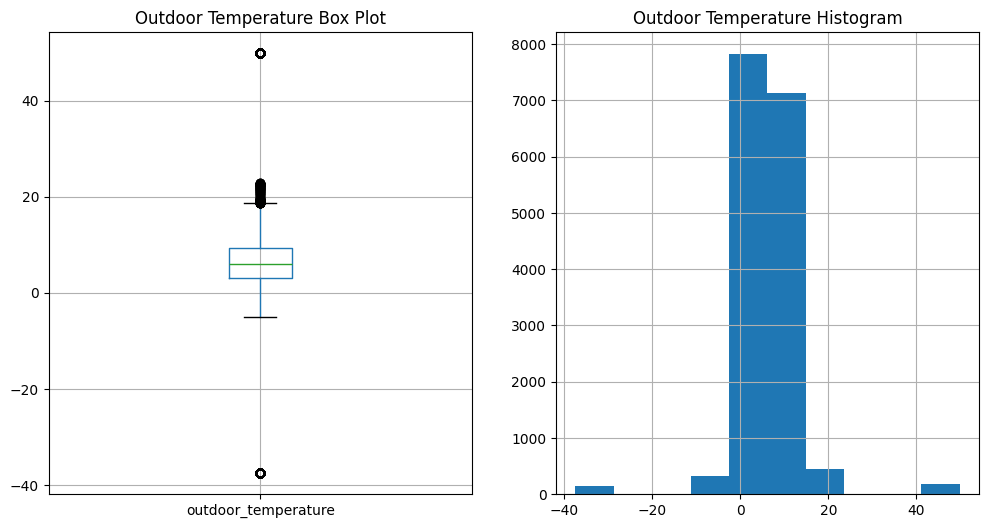

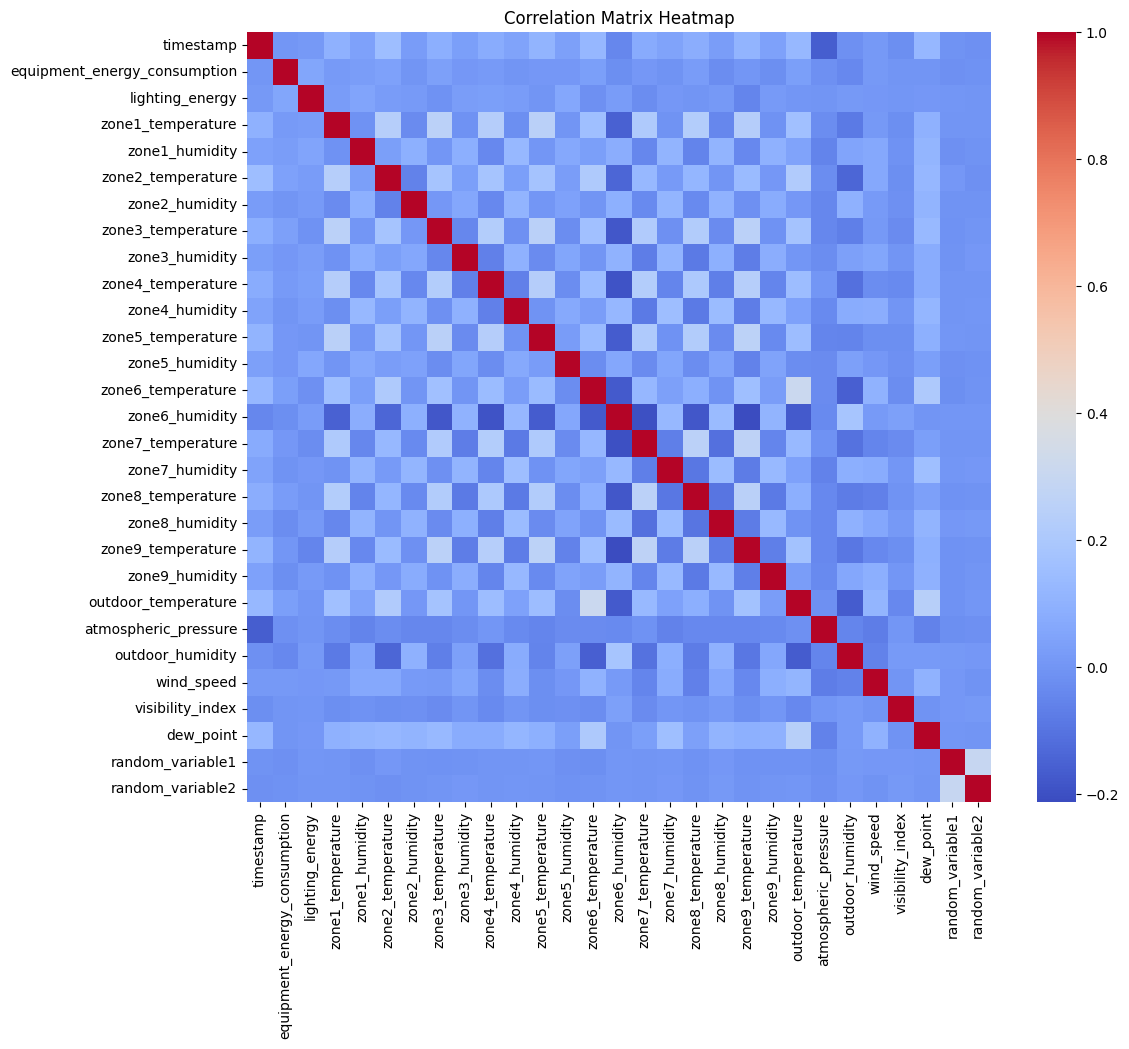

In [4]:
# Data Overview
display(df.info())
display(df.describe())
for col in df.select_dtypes(include=['object', 'category']):
    display(df[col].value_counts())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values Percentage:\n", missing_percentage)

# Outlier Detection (example with boxplot and histogram for one numerical feature)
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce') # Convert 'timestamp' to datetime

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot(column='outdoor_temperature')
plt.title('Outdoor Temperature Box Plot')
plt.subplot(1, 2, 2)
df['outdoor_temperature'].hist()
plt.title('Outdoor Temperature Histogram')
plt.show()

# Correlation Analysis (example for numerical features)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
correlation_matrix = df.corr(numeric_only=True)

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# (There are no obvious categorical variables apart from the timestamp, which needs further processing)



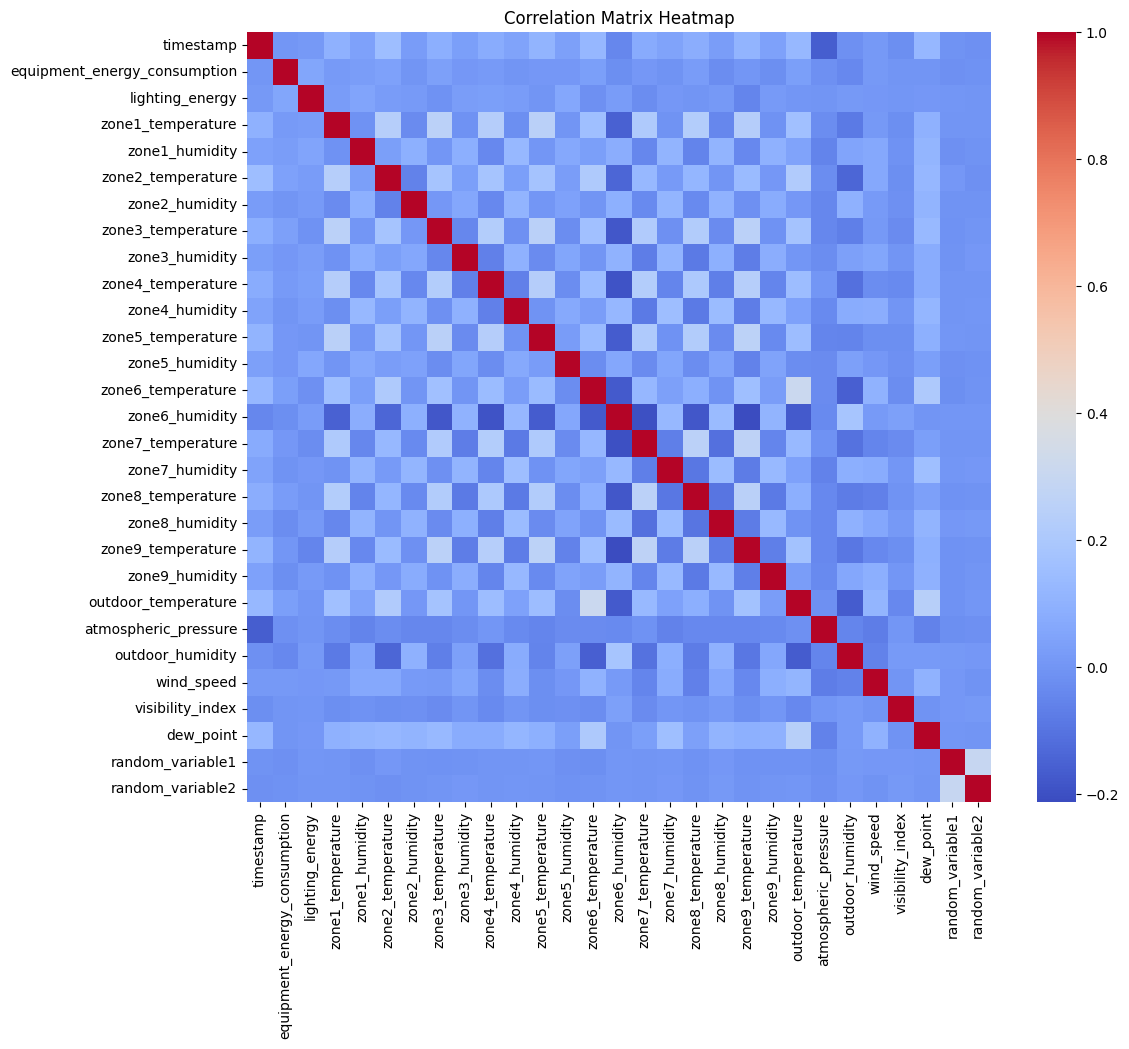

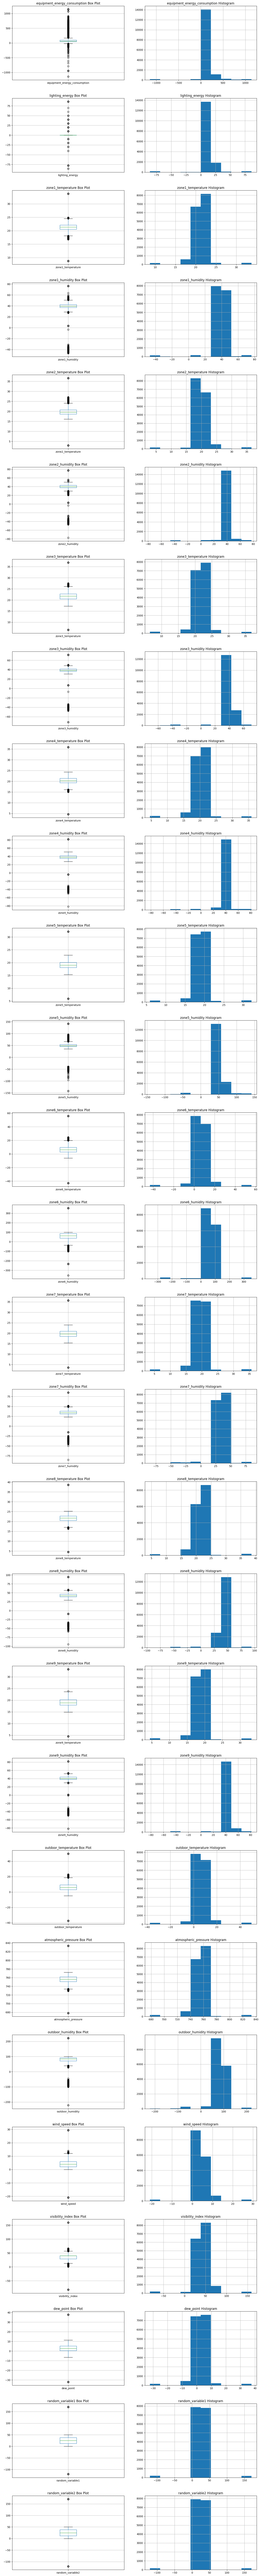

In [5]:

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Re-attempt numeric conversion for problematic columns
for col in ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity', 'zone6_humidity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Recalculate the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Outlier Detection (box plots and histograms for all numerical features)
numerical_features = df.select_dtypes(include=['float64', 'int64'])
num_plots = len(numerical_features.columns)
fig, axes = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))
fig.tight_layout(pad=5.0)
for i, col in enumerate(numerical_features.columns):
    df.boxplot(column=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} Box Plot')
    df[col].hist(ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Histogram')
plt.show()

The output shows the percentage of missing values for each column, for visualizing outlier detection we used a box plot. In correlation analysis: darker red represents positive correlation and darker blue represents negative correlation

# 2. The second step is data cleaning ie dealing with missing values and outliers

 Impute missing values using median for numerical features and most frequent category for categorical features. Drop columns with more than 50% missing values. Handle outliers using IQR method and replace them with the 95th percentile.

In [6]:
# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Missing value imputation
for col in numerical_cols:
    if df[col].isnull().sum() / len(df) > 0.5:
        print(f"Dropping column '{col}' due to more than 50% missing values.")
        df.drop(col, axis=1, inplace=True)
        numerical_cols = numerical_cols.drop(col)
    else:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Imputed missing values in '{col}' with median.")

for col in categorical_cols:
    if df[col].isnull().sum() / len(df) > 0.5:
        print(f"Dropping column '{col}' due to more than 50% missing values.")
        df.drop(col, axis=1, inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Imputed missing values in '{col}' with the most frequent category.")

# Outlier handling
for col in numerical_cols:
    if col != 'timestamp':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = len(outliers)
        print(f"Number of outliers in '{col}': {num_outliers}")
        df[col] = np.clip(df[col], lower_bound, df[col].quantile(0.95))
        print(f"Outliers in '{col}' replaced with 95th percentile.")

# Verify no missing values
print(f"Number of missing values after imputation: {df.isnull().sum().sum()}")

# Verify no outliers
for col in numerical_cols:
    if col != 'timestamp':
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
      num_outliers = len(outliers)
      print(f"Number of outliers remaining in '{col}': {num_outliers}")

<ipython-input-6-33c73d13c949>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Imputed missing values in 'equipment_energy_consumption' with median.
Imputed missing values in 'lighting_energy' with median.
Imputed missing values in 'zone1_temperature' with median.
Imputed missing values in 'zone1_humidity' with median.
Imputed missing values in 'zone2_temperature' with median.
Imputed missing values in 'zone2_humidity' with median.
Imputed missing values in 'zone3_temperature' with median.
Imputed missing values in 'zone3_humidity' with median.
Imputed missing values in 'zone4_temperature' with median.
Imputed missing values in 'zone4_humidity' with median.
Imputed missing values in 'zone5_temperature' with median.
Imputed missing values in 'zone5_humidity' with median.
Imputed missing values in 'zone6_temperature' with median.
Imputed missing values in 'zone6_humidity' with median.
Imputed missing values in 'zone7_temperature' with median.
Imputed missing values in 'zone7_humidity' with median.
Imputed missing values in 'zone8_temperature' with median.
Imputed m

# 3. Data transformation and feature engineering


 Here we perform data type conversion, feature engineering, outlier handling, and normalization/scaling.

In [25]:
# Data Type Conversion
df['timestamp'] = pd.to_datetime(df['timestamp'])

for col in ['equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature', 'zone2_humidity', 'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone4_humidity', 'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_temperature', 'zone7_humidity', 'zone8_temperature', 'zone8_humidity', 'zone9_temperature', 'zone9_humidity', 'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point', 'random_variable1', 'random_variable2']:
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')


# Feature Engineering
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# Handling Remaining Outliers (using the same IQR method but with transformed data)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if col not in ['hour', 'dayofweek', 'month']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound.iloc[0] if isinstance(lower_bound, pd.Series) else lower_bound,
                           upper_bound.iloc[0] if isinstance(upper_bound, pd.Series) else upper_bound)


# Normalization/Scaling (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
  if col not in ['hour', 'dayofweek', 'month']:
    df[col] = scaler.fit_transform(df[[col]])

Prepared the data for analysis by ensuring the correct data types for the columns. Created new features from the timestamp. Handled outliers to remove their impact and sclaed numerical features to a common range

**Numerical missing values** were imputed with the median, and categorical missing values with the mode. Columns with more than 50% missing values were dropped.
**Outliers** were identified and initially handled by clipping values outside 1.5 times the IQR below Q1 and above Q3 to those bounds.  Later, outliers in the transformed data were handled using the same IQR method, but this didn't entirely eliminate them.
**Histograms and box plots** were generated to visualize the distributions of numerical features.
**Correlation matrices** were generated and visualized as heatmaps.



# 4. Data Visualization

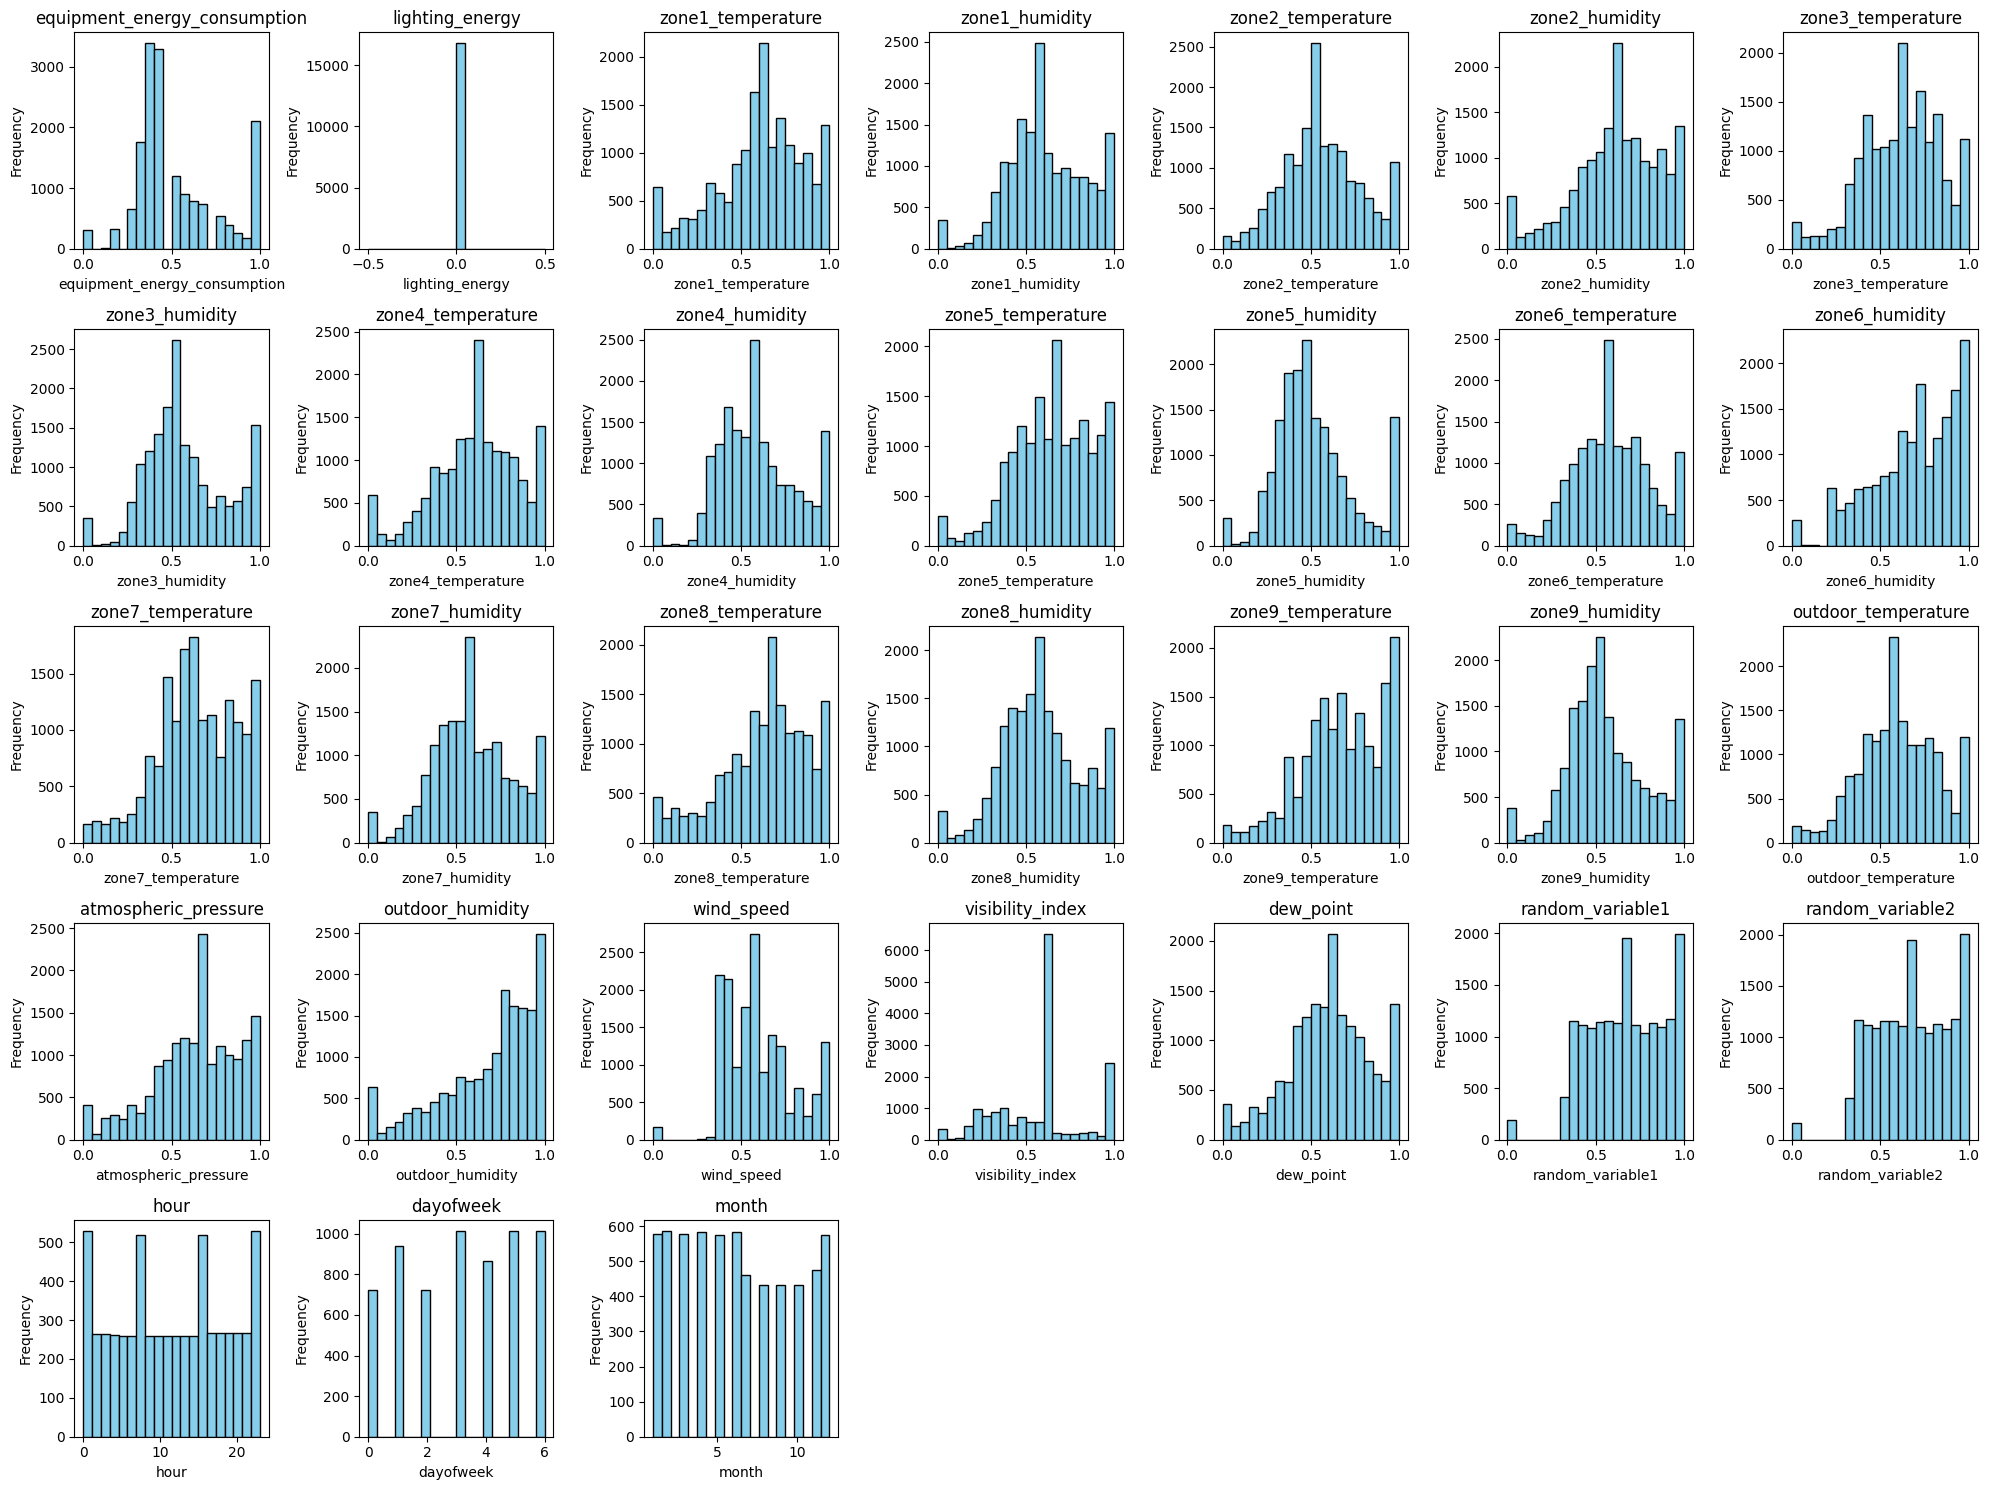

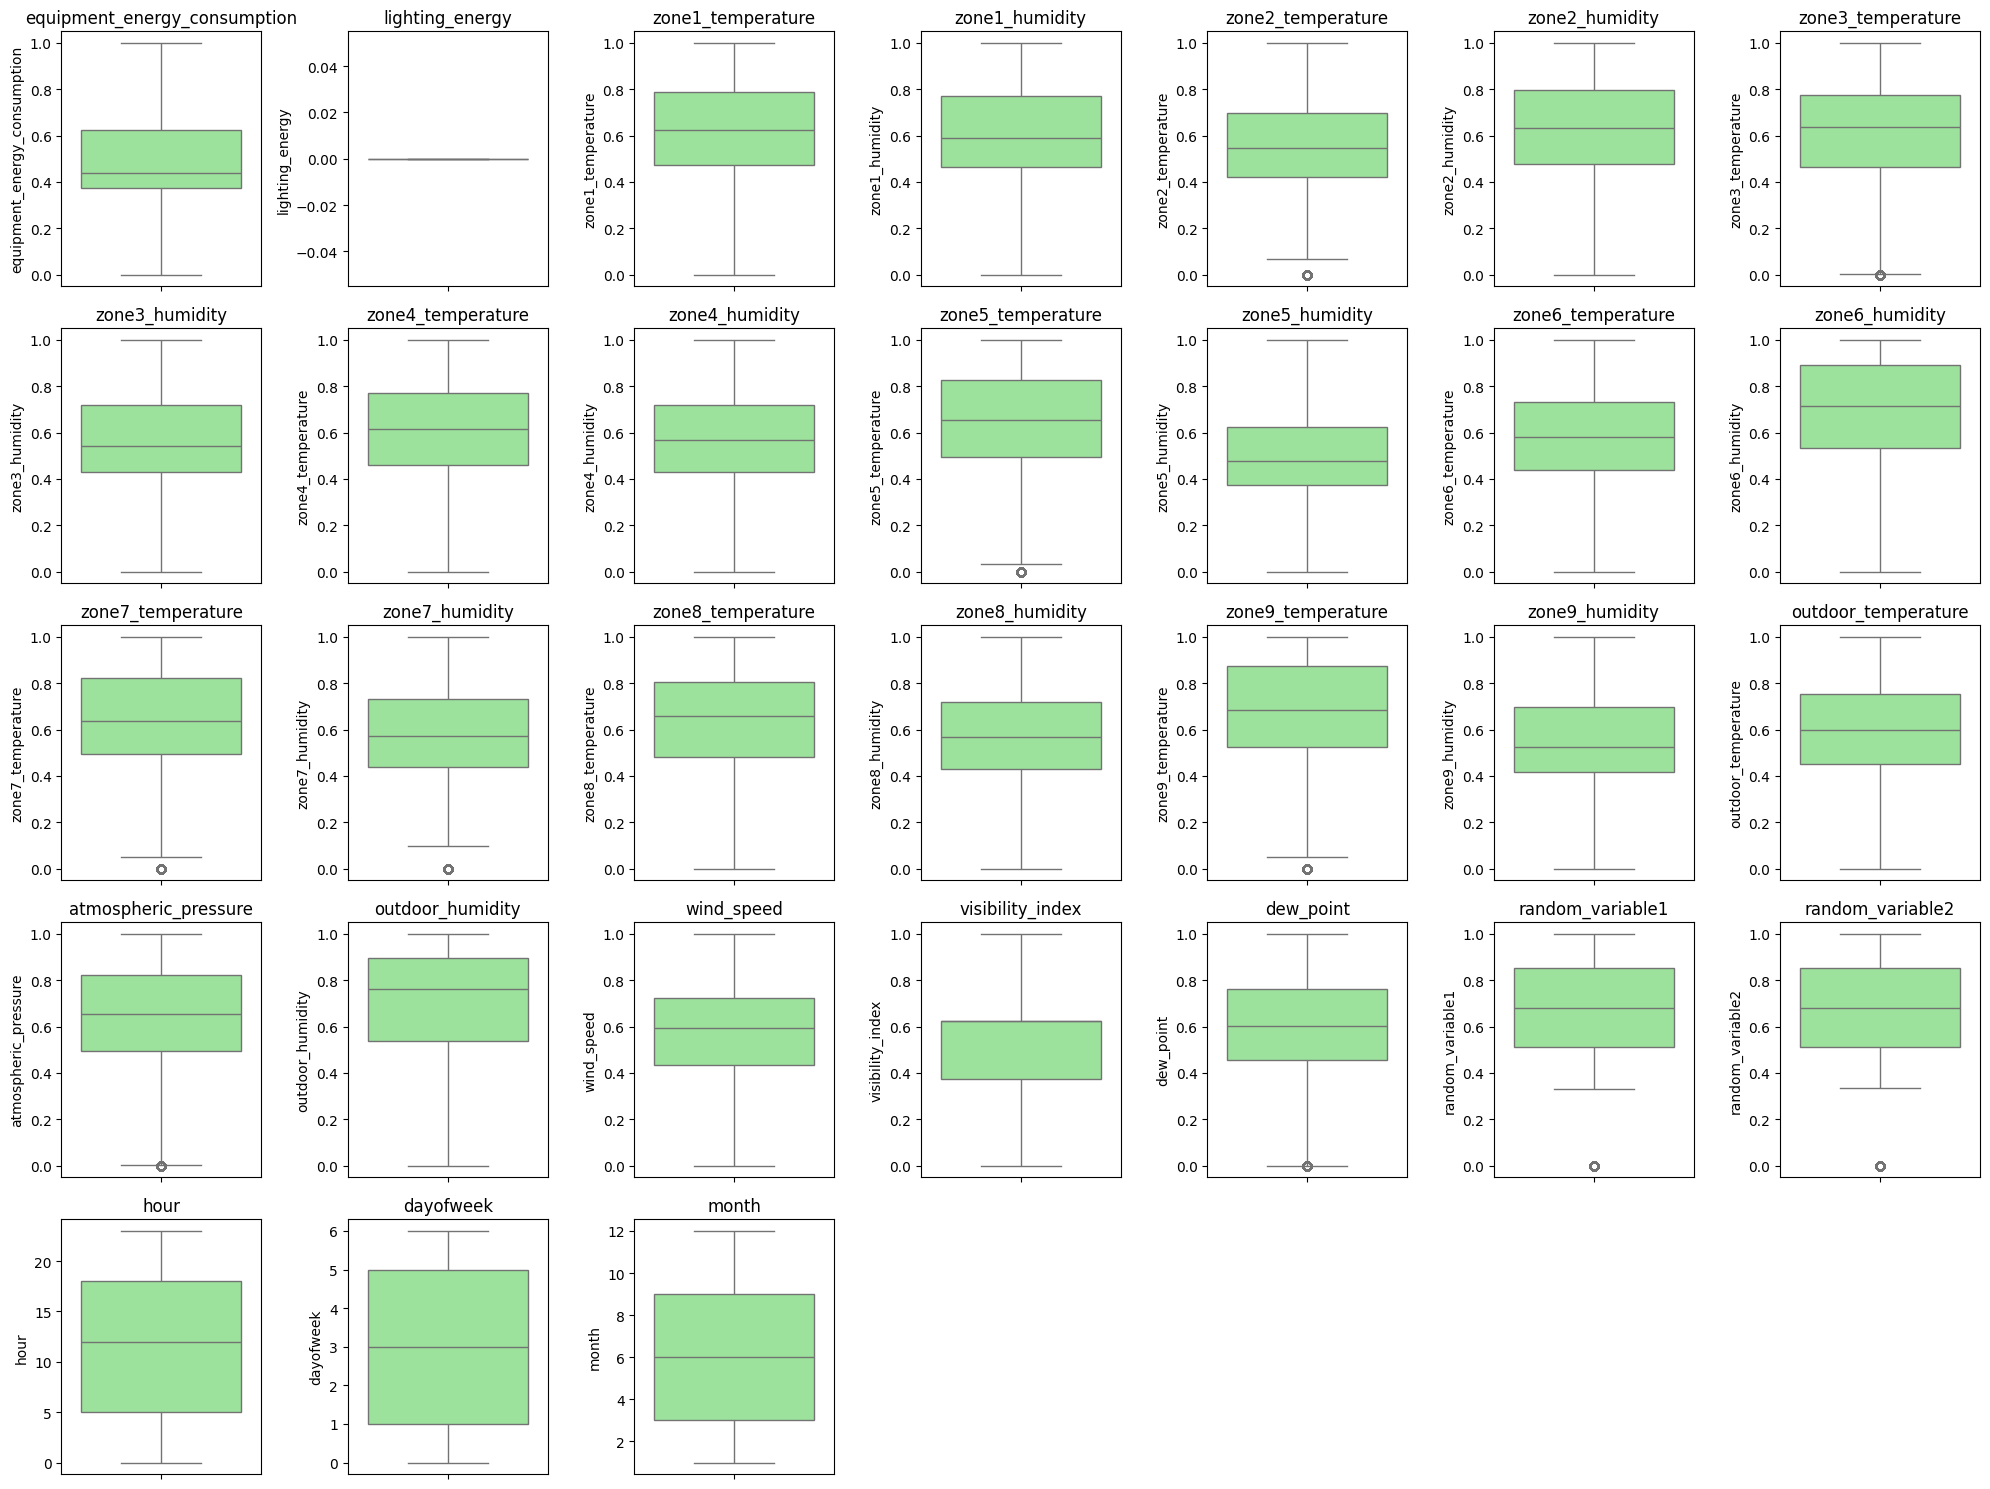

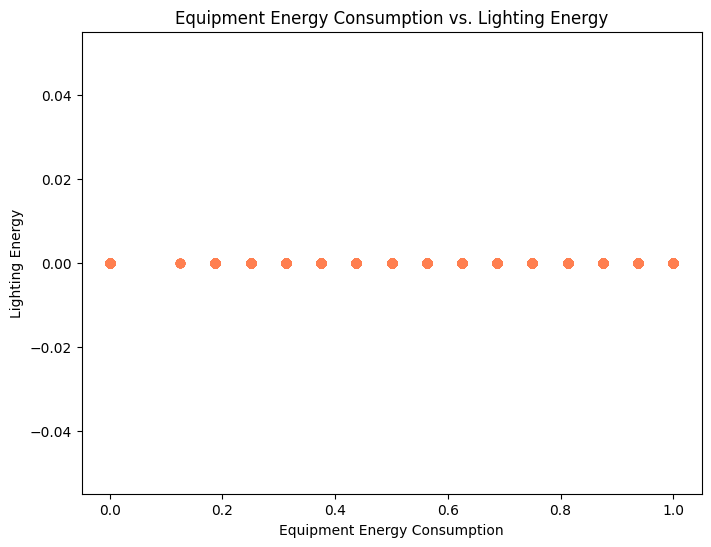

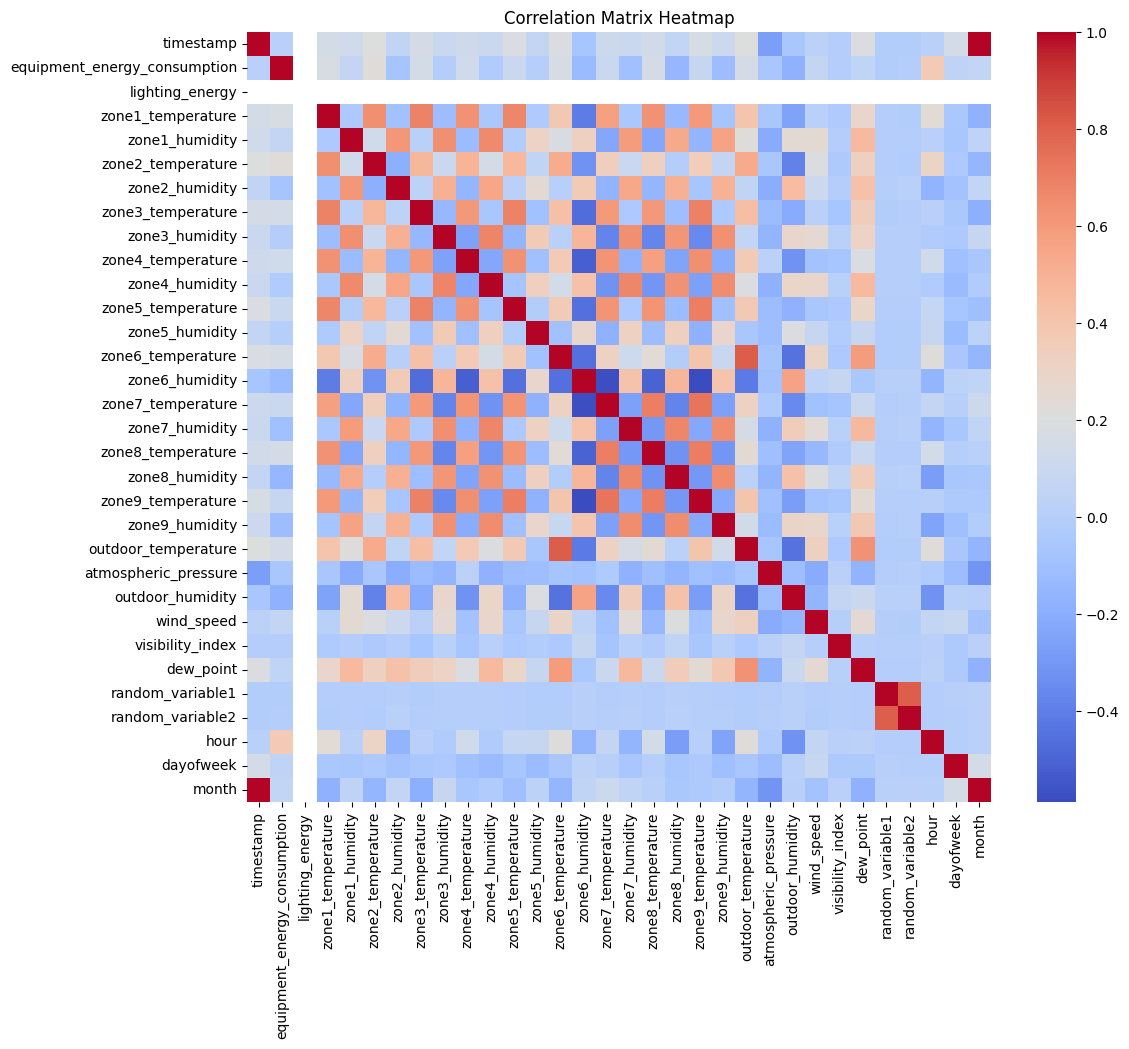

In [9]:
# Histograms
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 7, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(5, 7, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plots (example: equipment_energy_consumption vs lighting_energy)
plt.figure(figsize=(8, 6))
plt.scatter(df['equipment_energy_consumption'], df['lighting_energy'], color='coral')
plt.title('Equipment Energy Consumption vs. Lighting Energy')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Lighting Energy')
plt.show()


# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

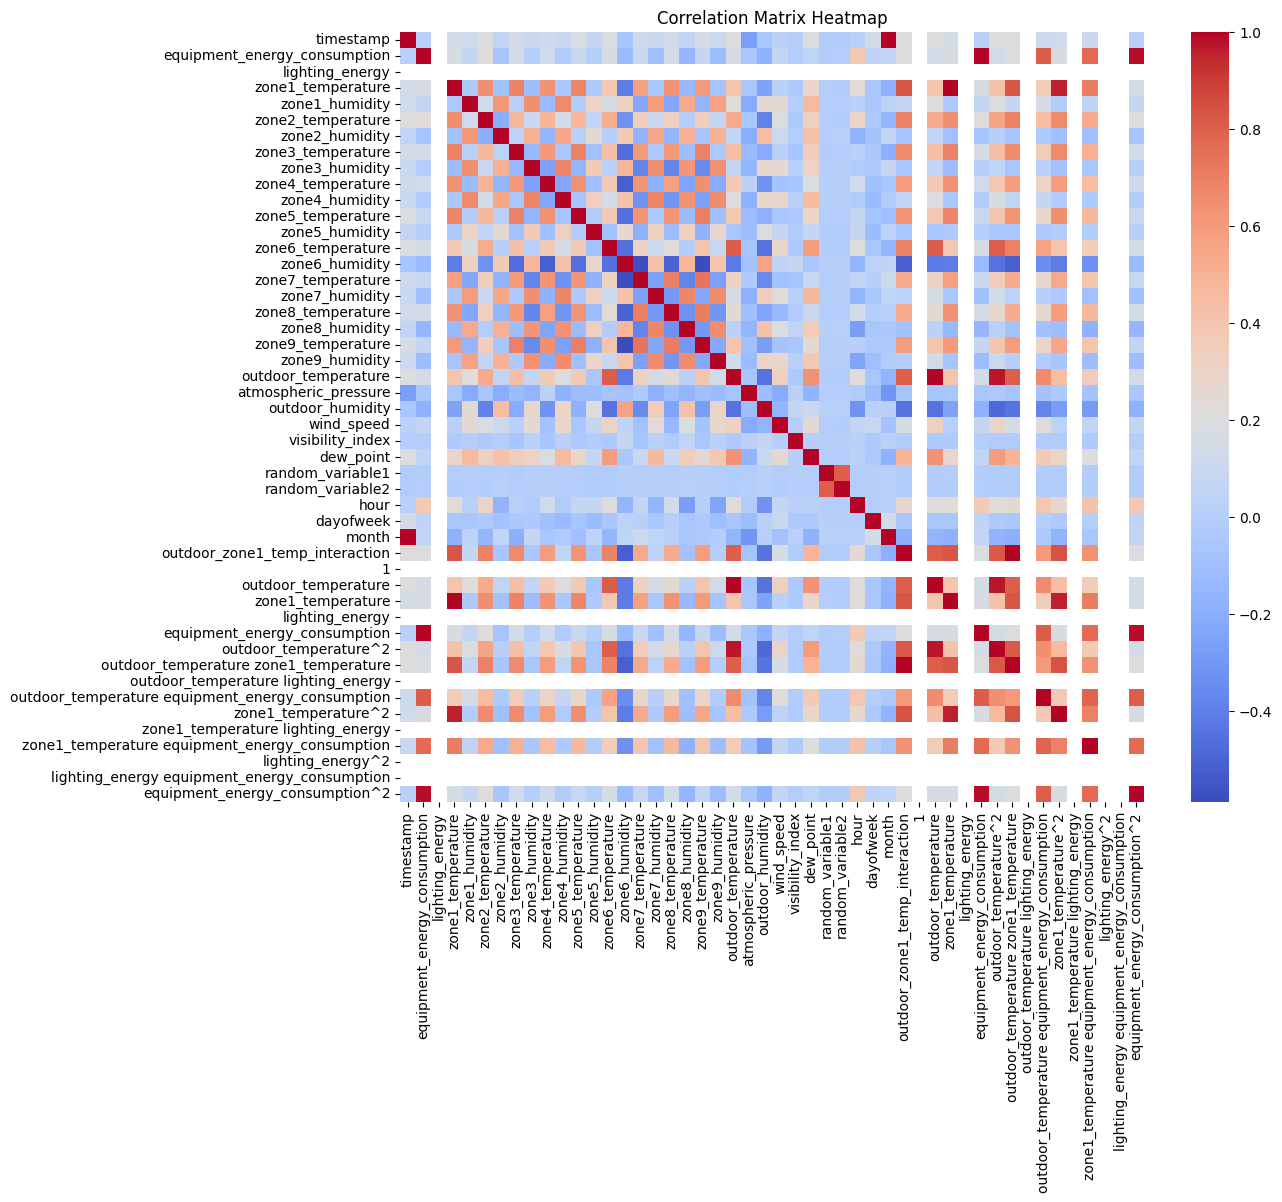

In [41]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

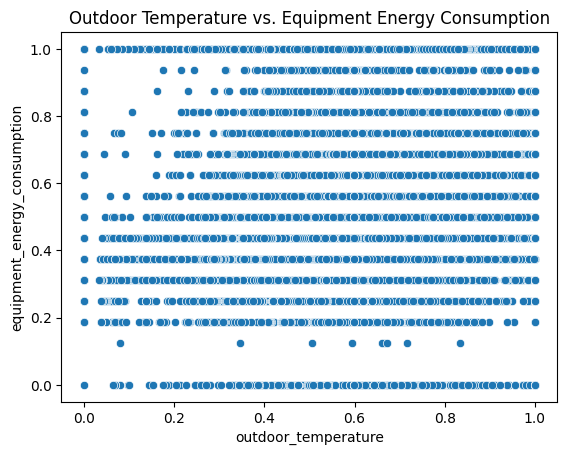

In [10]:
# Example: Relationship between outdoor temperature and equipment energy consumption
sns.scatterplot(x='outdoor_temperature', y='equipment_energy_consumption', data=df)
plt.title('Outdoor Temperature vs. Equipment Energy Consumption')
plt.show()

# Explore other numerical relationships:
# sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df)
# sns.scatterplot(x='lighting_energy', y='zone1_temperature', data=df)
# ... (add more scatter plots for other column pairs)

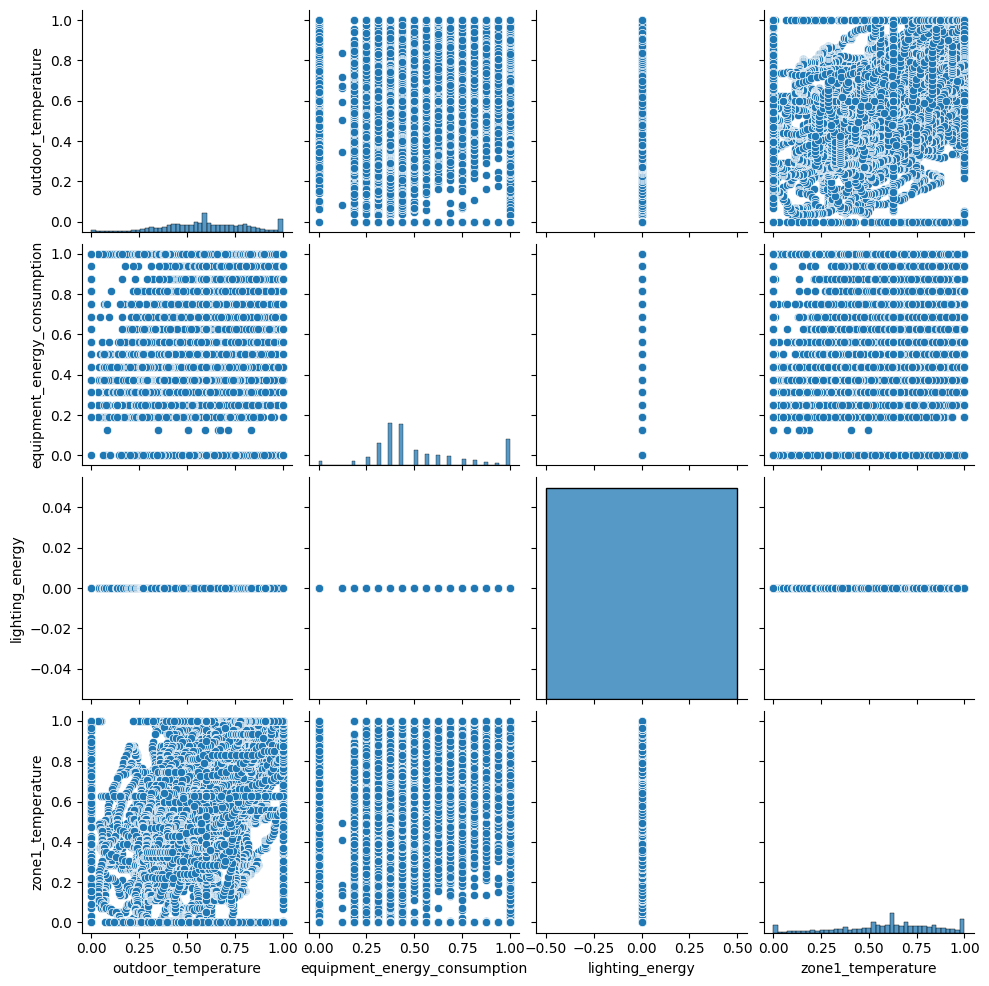

In [11]:
# Select a subset of numerical columns for the pair plot
numerical_cols_subset = ['outdoor_temperature', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature']

# Create a pair plot
sns.pairplot(df[numerical_cols_subset])
plt.show()

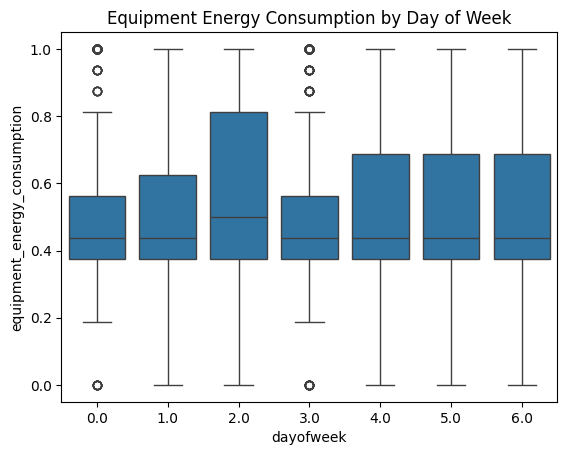

In [12]:
# Example: Equipment energy consumption across different days of the week
sns.boxplot(x='dayofweek', y='equipment_energy_consumption', data=df)
plt.title('Equipment Energy Consumption by Day of Week')
plt.show()

# Explore other categorical vs. numerical relationships:
# sns.boxplot(x='month', y='lighting_energy', data=df)
# ... (add more box plots for other column pairs)

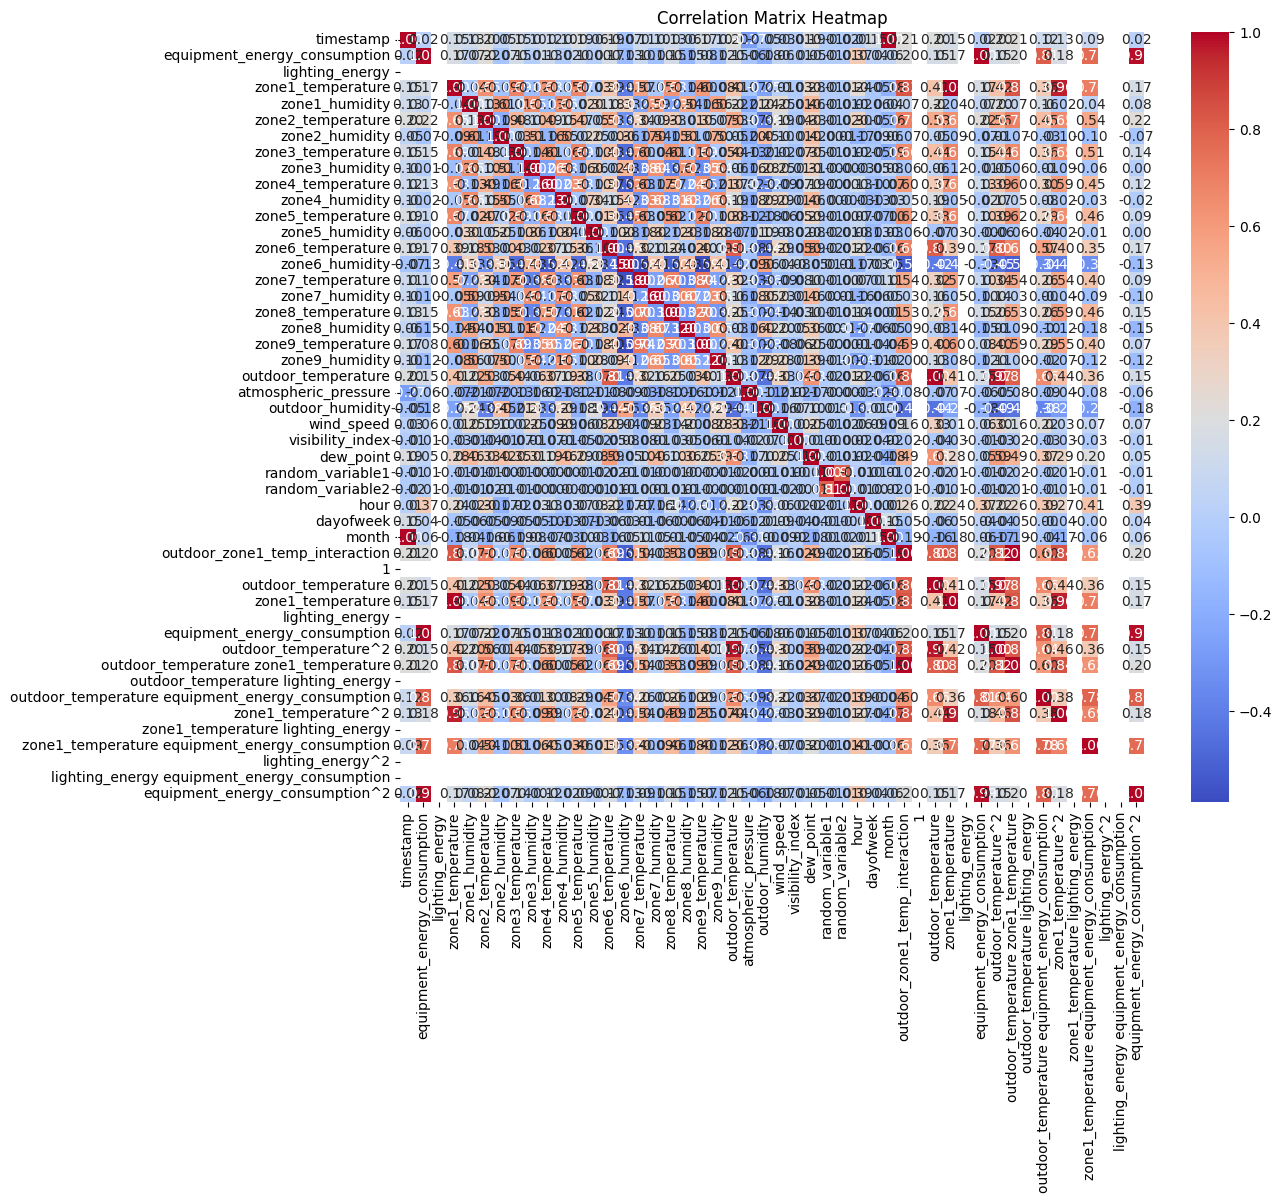

In [40]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annotations for better readability
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

print("\n--- Skewness ---\n")
print(skewness.to_markdown(numalign="left", stralign="left"))
# Calculate skewness and kurtosis
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

print("\n--- Skewness ---\n")
print(skewness.to_markdown(numalign="left", stralign="left"))

print("\n--- Kurtosis ---\n")
print(kurtosis.to_markdown(numalign="left", stralign="left"))


--- Skewness ---

|                                                  | 0           |
|:-------------------------------------------------|:------------|
| equipment_energy_consumption                     | 0.722518    |
| equipment_energy_consumption                     | 0.722518    |
| lighting_energy                                  | 0           |
| lighting_energy                                  | 0           |
| zone1_temperature                                | -0.566544   |
| zone1_temperature                                | -0.566544   |
| zone1_humidity                                   | -0.134605   |
| zone2_temperature                                | 0.0883853   |
| zone2_humidity                                   | -0.560177   |
| zone3_temperature                                | -0.380196   |
| zone3_humidity                                   | 0.192605    |
| zone4_temperature                                | -0.471153   |
| zone4_humidity                           

# 5. Feature Engineering by adding polynomial features


In [14]:
# Assuming 'timestamp' is your datetime column
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract features like hour, dayofweek, month, etc.
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

In [15]:
# Example: Interaction between outdoor temperature and zone1 temperature
df['outdoor_zone1_temp_interaction'] = df['outdoor_temperature'] * df['zone1_temperature']

In [16]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for polynomial expansion
numerical_features = ['outdoor_temperature', 'zone1_temperature', 'lighting_energy', 'equipment_energy_consumption'] # Replace ... with actual column names

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[numerical_features])

# Add polynomial features to the DataFrame
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))
df = pd.concat([df, poly_df], axis=1)

In [17]:
df

timestamp  equipment_energy_consumption  lighting_energy  \
0     2016-11-01 17:00:00                        0.4375              0.0   
1     2016-11-01 17:10:00                        0.4375              0.0   
2     2016-11-01 17:20:00                        0.3750              0.0   
3     2016-11-01 17:30:00                        0.3750              0.0   
4     2016-11-01 17:40:00                        0.4375              0.0   
...                   ...                           ...              ...   
16852 2016-03-10 20:10:00                        1.0000              0.0   
16853 2016-04-10 06:10:00                        0.3750              0.0   
16854 2016-03-11 00:50:00                        0.3750              0.0   
16855 2016-04-11 13:20:00                        0.5625              0.0   
16856 2016-01-12 15:50:00                        0.2500              0.0   

       zone1_temperature  zone1_humidity  zone2_temperature  zone2_humidity  \
0               1.000000        1.000000           0.492667        0.927221   
1               0.324211        1.000000           0.492667        0.922795   
2               0.324211        1.000000           0.492667        0.916512   
3               1.000000        0.998397           0.492667        0.914108   
4               0.324211        1.000000           0.492667        0.910174   
...                  ...             ...                ...             ...   
16852           0.789474        0.559250           0.573786        0.584745   
16853           0.618947        0.613271           0.341430        0.894438   
16854           0.640000        0.491474           0.391384        0.610971   
16855           0.873684        0.597324           1.000000        0.333188   
16856           0.361404        0.866633           0.483501        0.800896   

       zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0               0.345133        0.542593           0.416362  ...   
1               0.345133        0.975178           0.416362  ...   
2               0.345133        0.984881           1.000000  ...   
3               0.345133        0.989394           0.615014  ...   
4               0.345133        0.989394           0.399423  ...   
...                  ...             ...                ...  ...   
16852           0.566372        0.572718           0.784408  ...   
16853           0.728614        0.566964           0.615014  ...   
16854           0.538348        0.501298           0.662753  ...   
16855           0.833333        0.515514           0.923003  ...   
16856           0.359882        0.973147           0.508758  ...   

       outdoor_temperature^2  outdoor_temperature zone1_temperature  \
0                   0.396167                               0.629418   
1                   0.388662                               0.202122   
2                   0.381229                               0.200180   
3                   0.373867                               0.611447   
4                   0.366577                               0.196295   
...                      ...                                    ...   
16852               0.347153                               0.465155   
16853               0.230072                               0.296883   
16854               0.144696                               0.243449   
16855               1.000000                               0.873684   
16856               0.383345                               0.223763   

       outdoor_temperature lighting_energy  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
16852                                  0.0   
16853                                  0.0   
16854                                  0.0   
16855                   

The number of columns have now increased to 48 ie we have added 19 new columns/features of 2 degrees

Performing PCA (Principal Component Analysis) for dimensionality reduction and to retain important features

**We used these features for pca:**
outdoor_temperature, zone1_temperature, zone2_temperature: Temperature significantly influences heating and cooling needs, impacting energy consumption.
lighting_energy: Lighting is a direct contributor to energy usage.
equipment_energy_consumption: This is likely the target variable or a key variable of interest in the analysis.
outdoor_zone1_temp_interaction: This engineered feature captures the combined effect of outdoor and zone 1 temperatures, which might have a non-linear impact on energy use.

Explained Variance Ratio: [0.45115228 0.18672125 0.1755501  0.10502656 0.05309814]


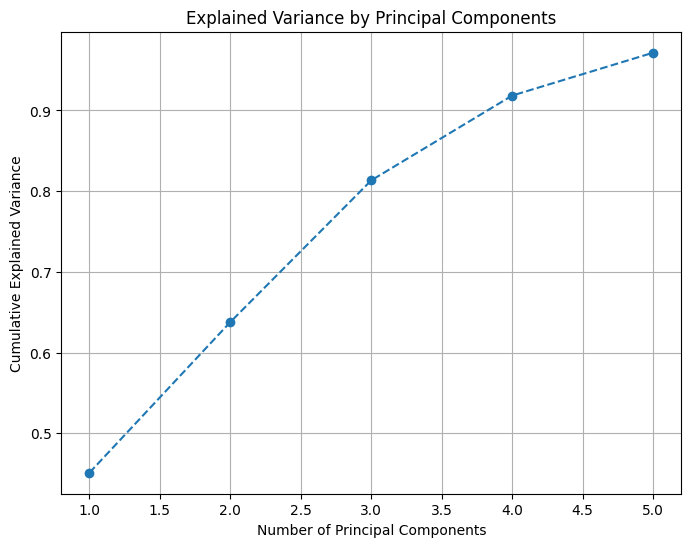

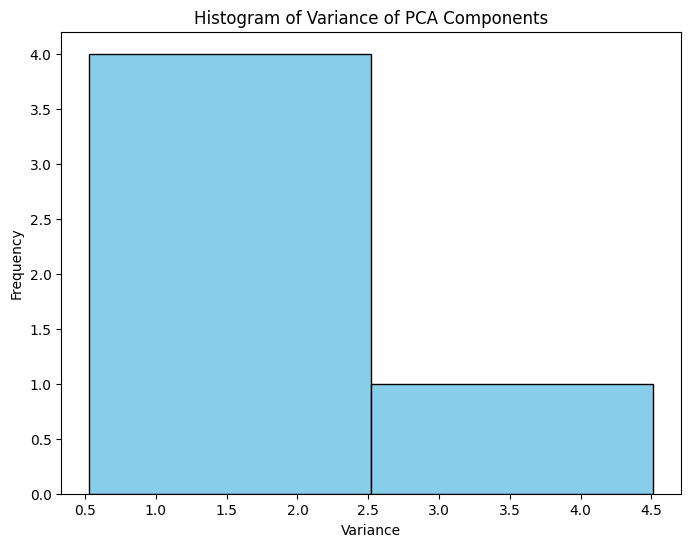

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Select numerical features for PCA
# Exclude 'timestamp', 'hour', 'dayofweek', 'month' and any other categorical or engineered features
numerical_features_for_pca = ['outdoor_temperature', 'zone1_temperature', 'lighting_energy', 'equipment_energy_consumption',
                             'zone1_humidity', 'zone2_temperature', 'zone2_humidity',
                             'outdoor_zone1_temp_interaction']

# 2. Create a subset DataFrame with selected features
data_for_pca = df[numerical_features_for_pca]

# 3. Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

# 4. Apply PCA
# Choose the number of components (n_components) you want to keep
# You can start with a large number and then analyze the explained variance to reduce it
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
principal_components = pca.fit_transform(scaled_data)

# 5. Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

# 6. Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance = pca.explained_variance_

# Plot the histogram of variance
plt.figure(figsize=(8, 6))
plt.hist(explained_variance, bins=2, color='skyblue', edgecolor='black')
plt.title('Histogram of Variance of PCA Components')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

# 7. Concatenate PCA components with original DataFrame
combined_df = pd.concat([df, pca_df], axis=1)

# Now 'pca_df' DataFrame containing the principal components,
# which can be used for further analysis or modeling.

# 6. Model Selection, Training and Testing

Using Linear regression, Random Forest Regressor, Decision Tree Regressor

**Linear Regression:** It acts as a baseline model. It's valuable to start with a simple, interpretable model like Linear Regression. It helps establish a performance benchmark and understand whether a more complex approach is necessary. If the dataset exhibits a strong linear relationship between features and target (equipment energy consumption), Linear Regression could provide a satisfactory solution with the benefit of simplicity and easy interpretability.

**Random Forest:** Its a robust and versatile model known for its high accuracy and ability to handle non-linear relationships and interactions between features. Given the complexity of energy consumption patterns, which can be influenced by various factors in a non-linear manner, Random Forest is a strong contender for achieving good predictive performance.

**Decision Tree:** It provides interpretability and is capable of handling non-linear relationships. Decision Tree offers a balance between simplicity and predictive power. Its tree-like structure allows for easy understanding of the decision-making process, which can be valuable in gaining insights into the factors driving energy consumption.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming 'combined_df' contains the features (including principal components)
# and 'target' is the target variable ('equipment_energy_consumption')
target = combined_df['equipment_energy_consumption']
# 1. Select features for training
features = ['PC1', 'PC2', 'outdoor_temperature', 'zone1_temperature', 'lighting_energy']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], target, test_size=0.2, random_state=42)

# 3. Define models and hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),  # No hyperparameters for Linear Regression
    'Random Forest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    })
}

# 4. Perform GridSearchCV for hyperparameter tuning and cross-validation
best_models = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best hyperparameters = {grid_search.best_params_}")

# 5. Make predictions on the test set using the best models
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_test)

# 6. Evaluate model performance
results = {}
for name, prediction in predictions.items():
    mse = mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction) # Calculate RMSE
    mae = mean_absolute_error(y_test, prediction)  # Calculate MAE
    r2 = r2_score(y_test, prediction)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}

# 7. Compare model performance
print("\nModel Performance:")
for name, result in results.items():
    print(f"{name}: MSE = {result['MSE']:.4f}, RMSE = {result['RMSE']:.4f}, MAE = {result['MAE']:.4f}, R-squared = {result['R-squared']:.4f}")

# 8. Choose the best model and make predictions on new data
best_model_name = min(results, key=lambda k: results[k]['MSE'])
best_model = best_models[best_model_name]


Linear Regression: Best hyperparameters = {}
Random Forest: Best hyperparameters = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Decision Tree: Best hyperparameters = {'max_depth': 10, 'min_samples_split': 10}

Model Performance:
Linear Regression: MSE = 0.0024, RMSE = 0.0024, MAE = 0.0385, R-squared = 0.9576
Random Forest: MSE = 0.0015, RMSE = 0.0015, MAE = 0.0268, R-squared = 0.9728
Decision Tree: MSE = 0.0023, RMSE = 0.0023, MAE = 0.0335, R-squared = 0.9600


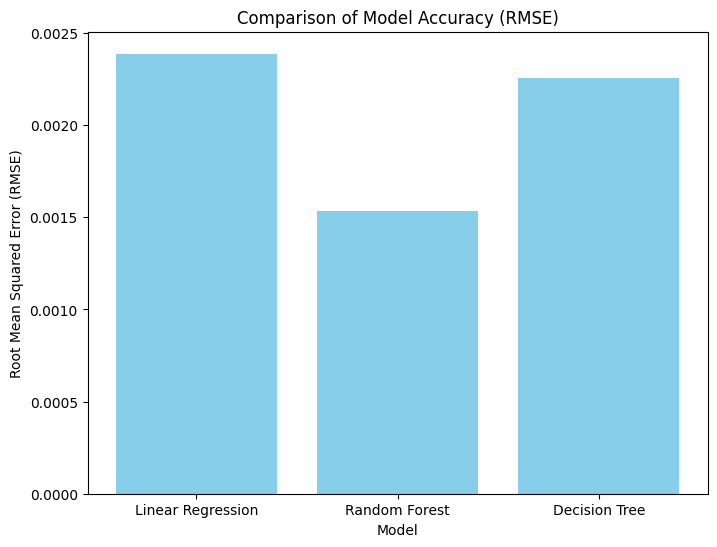

In [37]:
# 4. Create bar plots for comparison
model_names = list(results.keys())
rmse_values = [results[name]['RMSE'] for name in model_names]
mae_values = [results[name]['MAE'] for name in model_names]
r2_values = [results[name]['R-squared'] for name in model_names]

# Plot RMSE
plt.figure(figsize=(8, 6))
plt.bar(model_names, rmse_values, color='skyblue')
plt.title('Comparison of Model Accuracy (RMSE)')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

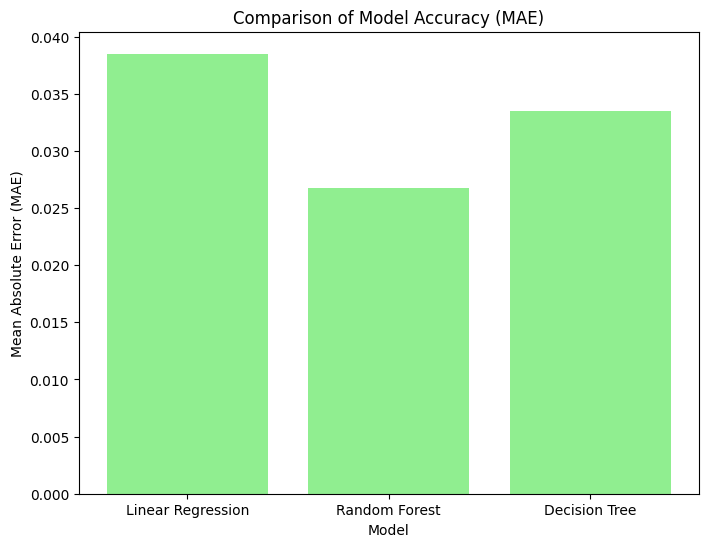

In [35]:
# Plot MAE
plt.figure(figsize=(8, 6))
plt.bar(model_names, mae_values, color='lightgreen')
plt.title('Comparison of Model Accuracy (MAE)')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()


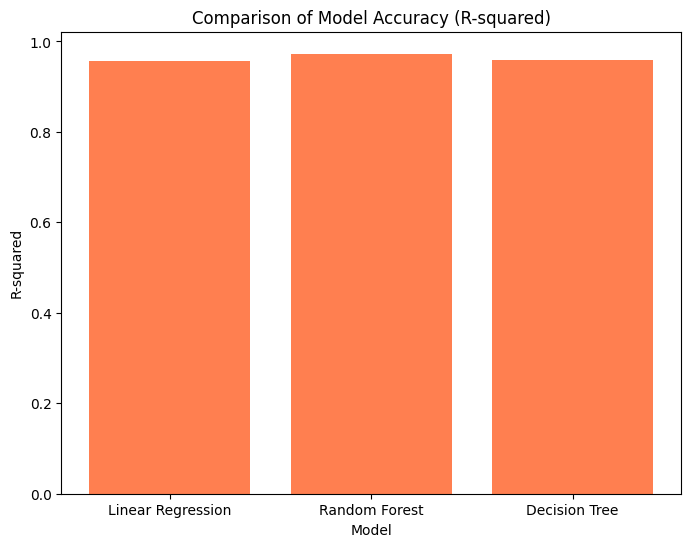

In [36]:

# Plot R-squared
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_values, color='coral')
plt.title('Comparison of Model Accuracy (R-squared)')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()

In [39]:
best_model

RandomForestRegressor(n_estimators=300, random_state=42)

After comparing between the models we can say random forest regressor is the best model for predicting the values of equipment_energy_consumption